# Assignment 3: Using RNN to predict stock price            Viryuth Vuth 

# Step 1: Data Aquisition and Insight Creation.


In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

The historical stock data is collected from the Google Stock Price through the link on the assignment 3 instruction file and this historical data is used for the prediction of future stock prices.\
'read_csv()' is an important pandas function to read csv files and do operations on it.

In [2]:
# Reading training dataset.
dataset_google = pd.read_csv('/Users/Viryuth/Documents/Deep_Learning/Assignment_3/data/Google_Stock_Price_Train.csv',index_col="Date",parse_dates=True)


In [3]:
# Printing top 5 rows of dataset.
dataset_google .head()


,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
# Similarly, printing last 5 rows of dataset.
dataset_google .tail()


,Open,High,Low,Close,Volume
Date,,,,,
2016-12-23,790.90,792.74,787.28,789.91,"623,400"
2016-12-27,790.68,797.86,787.66,791.55,"789,100"
2016-12-28,793.70,794.23,783.20,785.05,"1,153,800"
2016-12-29,783.33,785.93,778.92,782.79,"744,300"
2016-12-30,782.75,782.78,770.41,771.82,"1,770,000"


In [5]:
# Check if any of data is not applicable.
# The Boolean output 'False' represents that we have no non-applicable values.
dataset_google .isna().any()


Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [6]:
# Now printing the basic informations of our dataset.
dataset_google .info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


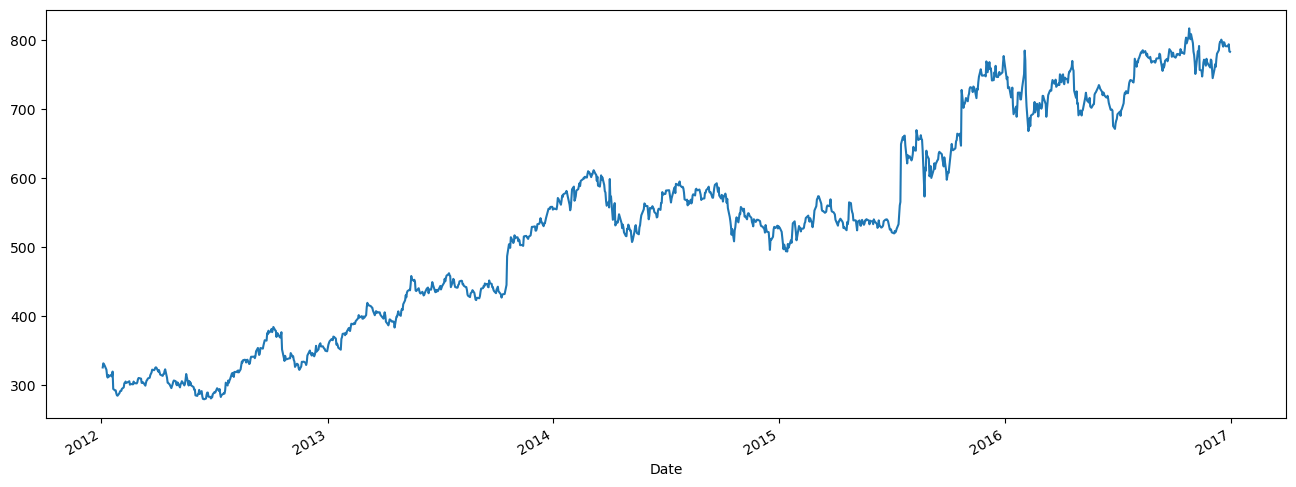

In [7]:
# Now plotting graph for growth of opening price from 2012 to 2017.
dataset_google ['Open'].plot(figsize=(16,6))
plt.savefig("dataset_google ")

**As we have noticed earlier from the data that three of the columns have data types** _float_ **while two have** _object_ **. Hence to homogenize it we are going to convert the column types of the dataframe.**

In [8]:
# converting str to str and replacing commas with None:
dataset_google["Volume"] = dataset_google["Volume"].astype(str).str.replace(',', '')

# Converting str to float
dataset_google["Volume"] = dataset_google["Volume"].astype(float)


In [9]:
# converting str to str and replacing commas with None:
dataset_google["Close"] = dataset_google["Close"].astype(str).str.replace(',', '')

# Converting str to float
dataset_google["Close"] = dataset_google["Close"].astype(float)

In [10]:
# Now again checking the data types of given columns.
dataset_google.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   float64
dtypes: float64(5)
memory usage: 59.0 KB


### Taking a look at rolling averages (or often called as 'rolling mean')

In statistics, a rolling average (also known as a moving average or running average) is a computation that analyses data points by generating a sequence of averages from various subsets of the complete data set. It is also referred to as a moving mean (MM) or rolling mean, and constitutes a form of finite impulse response filter.


**That means a Simple Rolling Average is the unweighted mean of the last n values.**

In [11]:
# Now we are interested in calculating 7 day rolling mean of our stock price.
dataset_google.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,643.132857,7.208100e+06
2012-01-12,321.457143,322.882857,316.841429,638.037143,6.691514e+06
2012-01-13,318.698571,319.801429,314.025714,631.870000,6.531857e+06


### Okay! Let's compare our earlier graph of growth of 'Open' price with the rolling average curve for the same:
* earlier graph represented by blue color
* and rolling graph represented by orange color

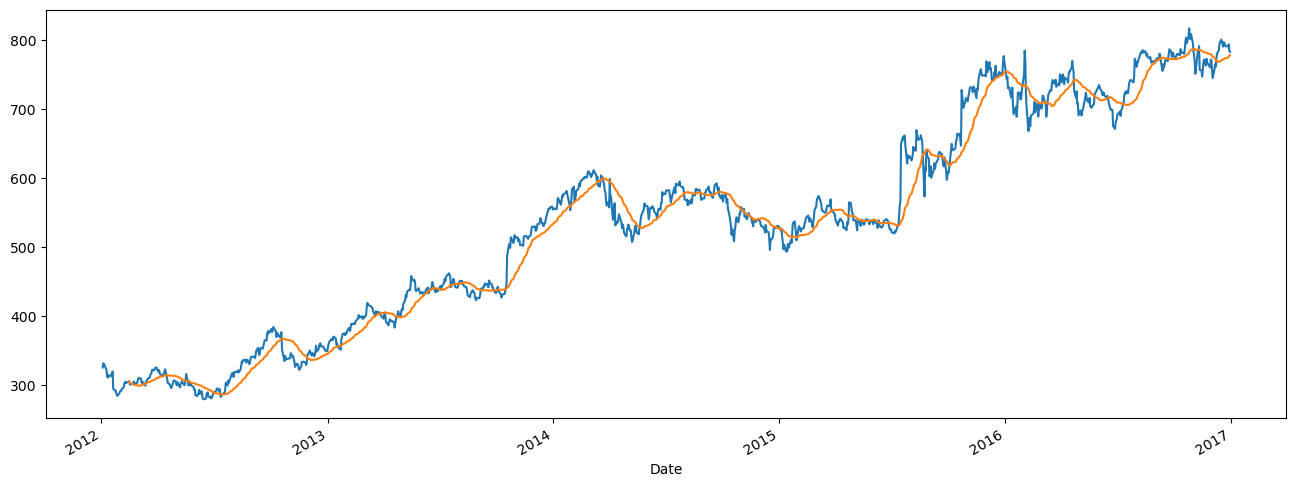

In [12]:
# Ploting 30 day rolling mean of 'Open' price along with
# the earlier graph of growth of 'Open' price.
dataset_google['Open'].plot(figsize=(16,6))
dataset_google.rolling(window=30).mean()['Open'].plot()
plt.savefig("dataset_google")

### Now compare 'Close' price with its rolling mean:

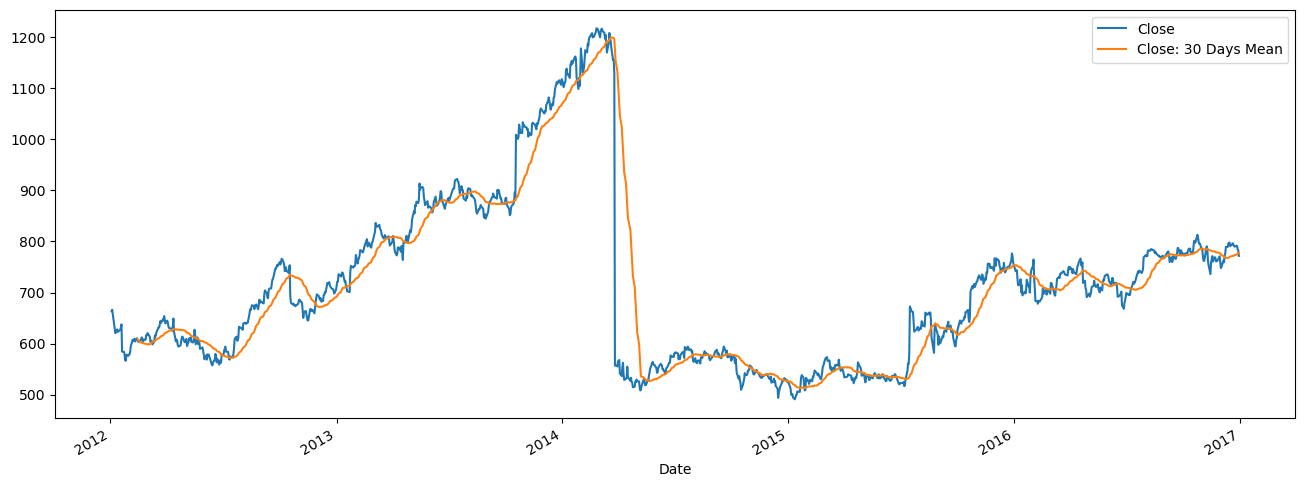

In [18]:
# Plotting graph of 'Close' price with its 30 day rolling mean.
dataset_google['Close: 30 Day Mean'] = dataset_google['Close'].rolling(window=30).mean()
dataset_google[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))
plt.savefig("dataset_google")


**We also have an option to specify a minimum number of period. So if we keep a minimum period of 1 then it means that minimum number of observation per window (which is of 30 days) should be one.**

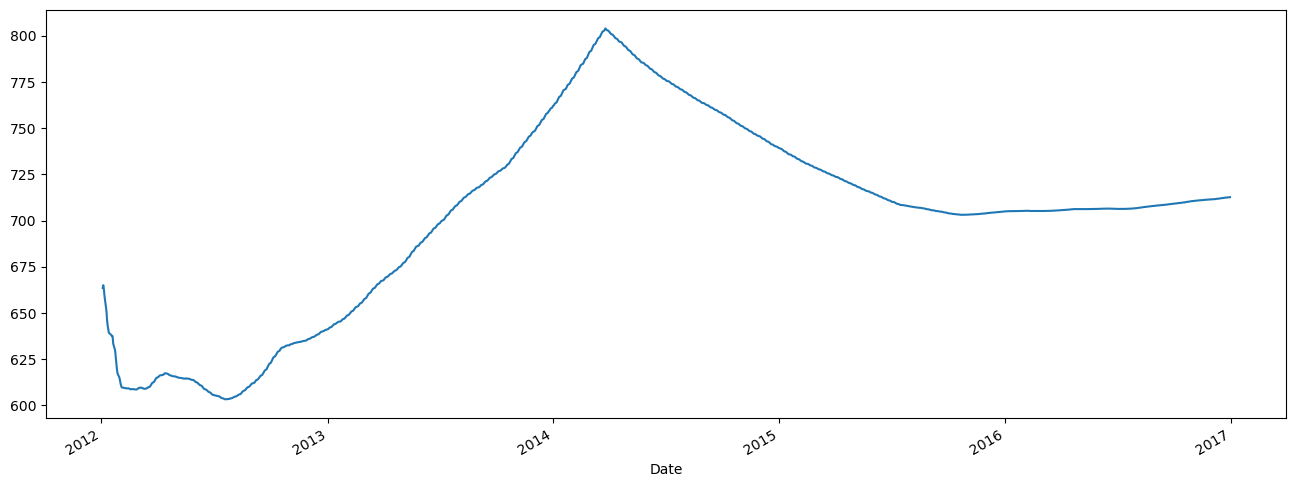

In [15]:
# Optionally we can specify a minimum number of periods.
dataset_google['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))
plt.savefig("dataset_apple")


### Now finally here we are creating our first dataframe.

In [16]:
training_set=dataset_google['Open']
training_set=pd.DataFrame(training_set)


# Step 2: Data Preprocessing

After the data is transformed into a clean dataset, the dataset is divided into training and testing sets to evaluate.

In [17]:
# Data Cleaning
# Checking if there is any non-applicable possibility
dataset_google.isna().any()

Open                  False
High                  False
Low                   False
Close                 False
Volume                False
Close: 30 Day Mean     True
dtype: bool

### Now in the next cell we are going to import MinMaxScaler() function from the Sklearn library. 

In [19]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [20]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In timestepwhat actually we are doing is that we are taking data of 60 days and predicting the price at 61st day. Similarly, taking data from 2nd day to 61st day and making prediction for 62nd day, and so on.

# Step 3: Feature Extraction

In this layer, only the features which are to be fed to the neural network are chosen.

In [21]:
# Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout



2024-12-03 03:57:26.761967: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Step 4: Training Neural Network

In this stage, the data is fed to the neural network and trained for prediction assigning random biases and weights.

In [22]:
# Initialising the RNN
regressor = Sequential()

In [23]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

/Users/Viryuth/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### 4.1: Optimizer
We will now compile our RNN. We will utilise a mechanism known as an optimizer. An optimizer is one of the two parameters necessary for processing sequential data with the _Sequential()_ function in the Keras library.


**Type of Optimizer**
The type of of optimizer used can greatly affect how fast the algorothim converges to the minimum value. Here we have chosen to use **Adam** optimizer. The Adam optimizer combines the perks of two other optimizers:\
**ADAgrad** and **RMSprop**

Now the ADAgrad optimizer essentially uses a different learning rate for every parameter and every step. The reasoning behind it is that parameters that are infrequent must have larger learning rates while parameters that are frequent must have smaller learning rates.\

_In other words, the learning rate is calculated based on the past gradients that have been computed for each parameter._

Talking about RMSprop, it considers fixing the diminishing learning rate by only using a certain number of previous gradients.

As we now have understood both ADAgrad & RMSprop, Let us move on to the Adam(Adaptive Movement Estimation):\
It is another method that computes the adaptive learning rates for each parameter by considering exponentially decaying average of the past gradients.

### 4.2: Regularization
It is crucial in model training to ensure that the weights remain controlled to prevent excessive concentration on a single data point, hence avoiding overfitting. Consequently, we should consistently apply a penalty for substantial weights, with the definition of 'substantial' contingent upon the type of regularizer employed; in this case, we have opted for Tikhonov Regularisation.


### 4.3: Dropouts
A novel approach to mitigating overfitting examines the effects of certain neurones becoming nonfunctional abruptly. This compels the model to avoid excessive reliance on certain groupings of neurones and to engage all of them. Dropouts enhance the robustness of neurones, enabling them to forecast trends without concentrating on any single neurone.


In [24]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


# Stage 5: Output Generation

In this stage, the output value generated by the output layer of the RNN is compared with the target value.\
The error or the difference between the target and the obtained output value is minimized by using back propagation algorith.

In [25]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - loss: 0.0927
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0069
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0060
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0053
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0047
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0048
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0057
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0061
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0052
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0042
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0050
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0037
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0042
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0035
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - l

# Step 6: Visualization with graph

A rolling analysis of a time series model is often used to access the model's stability over time. When analyzing financial time series data using a statistical model, a key assumption is that the parameters of the model are constant over time.

In [26]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_google_test = pd.read_csv('/Users/Viryuth/Documents/Deep_Learning/Assignment_3/data/Google_Stock_Price_Test.csv',index_col="Date",parse_dates=True)



In [27]:
real_stock_price = dataset_google_test.iloc[:, 1:2].values

In [28]:
dataset_google_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [29]:
dataset_google_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


In [30]:
dataset_google_test["Volume"] = dataset_google_test["Volume"].str.replace(',', '').astype(float)

In [31]:
test_set=dataset_google_test['Open']
test_set=pd.DataFrame(test_set)

In [32]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes


In [33]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_google['Open'], dataset_google_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_google_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

/Users/Viryuth/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step


In [34]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 212.0 bytes


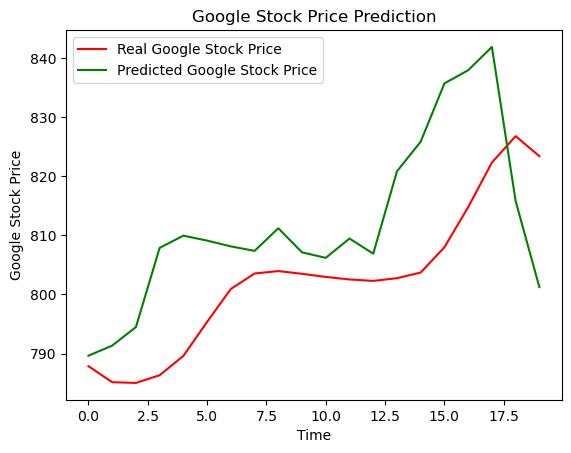

In [39]:
# Visualising the results
plt.plot(predicted_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(real_stock_price, color = 'green', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()